<a href="https://colab.research.google.com/github/Jawakar-7/Lesion-Detection-using-Mammograms/blob/main/Lesions_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/Jawakar-7/Lesion-Detection-using-Mammograms

Cloning into 'Lesion-Detection-using-Mammograms'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
Receiving objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0


In [4]:
! mkdir ~/.kaggle
! cp /content/Lesion-Detection-using-Mammograms/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d skooch/ddsm-mammography

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 2.88G/2.88G [00:29<00:00, 182MB/s]
100% 2.88G/2.88G [00:29<00:00, 103MB/s]


In [5]:
import zipfile
path= '/content/ddsm-mammography.zip'  #  path to  zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')  #extraction path


In [7]:
# import dependencies
import glob
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [8]:
images=[]
labels=[]
feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }
Image_height = 224
Image_width = 224

## Data Extraction and Preprocessing

In [9]:
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_example(example, feature_dictionary)
    return parsed_example

In [17]:
def read_data(filename):
    full_dataset = tf.data.TFRecordDataset(filename,num_parallel_reads=tf.data.experimental.AUTOTUNE)
    print(full_dataset)
    full_dataset = full_dataset.shuffle(buffer_size=31000)
    full_dataset = full_dataset.cache()
    print("Size of Training Dataset: ", len(list(full_dataset)))

    feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }

    full_dataset = full_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(full_dataset)
    i=0
    for image_features in full_dataset:
        i+=1
        image = image_features['image'].numpy()
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299])
        image=image.numpy()
        image=cv2.resize(image,(Image_height,Image_width))
        image=cv2.merge([image,image,image])

        images.append(image)
        labels.append(image_features['label_normal'].numpy())
        if i<=1:
          plt.imshow(image)
          print(image_features['label_normal'].numpy())
    del i

<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
<TFRecordDatasetV2 element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
33531


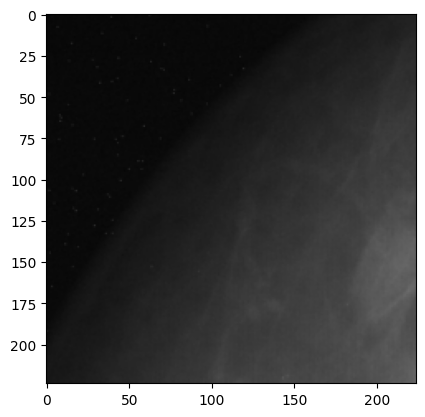

In [16]:
filenames=[
    '/content/data/training10_0/training10_0.tfrecords',
    '/content/data/training10_1/training10_1.tfrecords',
    '/content/data/training10_2/training10_2.tfrecords',

          ]

for file in filenames:
    read_data(file)


In [18]:
print(len(images))


33531


In [ ]:
images = np.array(images)
labels = np.array(labels)



plt.imshow(images[19])
print(images[0].shape)